# 1. Load The DataFrame

In [34]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
!pip install textstat
import pandas as pd
import textstat

In [35]:
drive.mount('/content/drive')
df_train = pd.read_pickle('/content/drive/MyDrive/UOK/Level4/Research/df_train.pkl')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
# Create a new column for readability metrics
df_train['flesch_kincaid_grade'] = df_train['text'].apply(lambda x: textstat.flesch_kincaid_grade(x))
df_train['automated_readability_index'] = df_train['text'].apply(lambda x: textstat.automated_readability_index(x))

In [37]:
df_train.head()

,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text,text_word_cnt,text_length,text_stopword_cnt,text_punct_cnt,text_number_cnt,cosine_similarity,prompt_text_embeddings,summary_text_embeddings,flesch_kincaid_grade,automated_readability_index
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,61,346,25,3,0,0.850777,"[-0.013830212876200676, -0.057283978909254074,...","[-0.023193225264549255, 0.005931235384196043, ...",8.1,8.3
1,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,206,1225,92,30,3,0.933708,"[-0.013830212876200676, -0.057283978909254074,...","[0.002113819122314453, -0.02102242223918438, -...",7.8,9.5
2,0095993991fe,814d6b,The third wave only started as an experiment w...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,60,345,27,9,0,0.877476,"[-0.013830212876200676, -0.057283978909254074,...","[0.018251139670610428, -0.01762312464416027, -...",5.6,7.0
3,00c20c6ddd23,814d6b,The experimen was orginally about how even whe...,0.567975,0.969062,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,76,451,35,10,0,0.853472,"[-0.013830212876200676, -0.057283978909254074,...","[-0.017345614731311798, -0.030272457748651505,...",12.0,14.5
4,00d40ad10dc9,814d6b,The third wave developed so quickly due to the...,-0.910596,-0.081769,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,27,145,12,2,0,0.771055,"[-0.013830212876200676, -0.057283978909254074,...","[0.0006335613434202969, 0.0029546485748142004,...",6.2,6.1


# 2. Analyze

In [38]:
def plot_histogram(dataframe, column_name, binsize=10):
    """
    Plot a histogram of a specific column in a DataFrame.

    Parameters:
    - dataframe: Pandas DataFrame
    - column_name: Name of the column to plot
    - binsize: Number of bins for the histogram (default is 20)
    """
    column_values = dataframe[column_name]

    # Plotting the histogram
    plt.hist(column_values, bins=binsize, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(f'{column_name} Values')
    plt.ylabel('Frequency')
    plt.show()

def plot_side_by_side_histogram(dataframe, column_names, binsize=200):
    """
    Plot side-by-side histograms for specified columns in a DataFrame.

    Parameters:
    - dataframe: Pandas DataFrame
    - column_names: List of column names to plot
    - binsize: Number of bins for the histograms (default is 20)
    """
    num_columns = len(column_names)

    # Create subplots with the specified number of columns
    fig, axes = plt.subplots(1, num_columns, figsize=(15, 5), sharey=True)

    for i, column_name in enumerate(column_names):
        column_values = dataframe[column_name]

        # Plotting the histogram on the current subplot
        axes[i].hist(column_values, bins=binsize, color='skyblue', edgecolor='black')
        axes[i].set_title(f'Histogram of {column_name}')
        axes[i].set_xlabel(f'{column_name} Values')

    # Set a common ylabel for all subplots
    axes[0].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

def plot_cosine_similarity_scatter(dataframe, column_name):
    """
    Plot a scatter plot of cosine similarity values for each row.

    Parameters:
    - dataframe: Pandas DataFrame
    - column_name: Name of the column containing cosine similarity values
    """
    cosine_similarity_values = dataframe[column_name]

    # Plotting the scatter plot
    plt.scatter(range(len(cosine_similarity_values)), cosine_similarity_values, color='skyblue')
    plt.title(f'Scatter Plot of {column_name}')
    plt.xlabel('Row Index')
    plt.ylabel(f'{column_name} Values')
    plt.show()

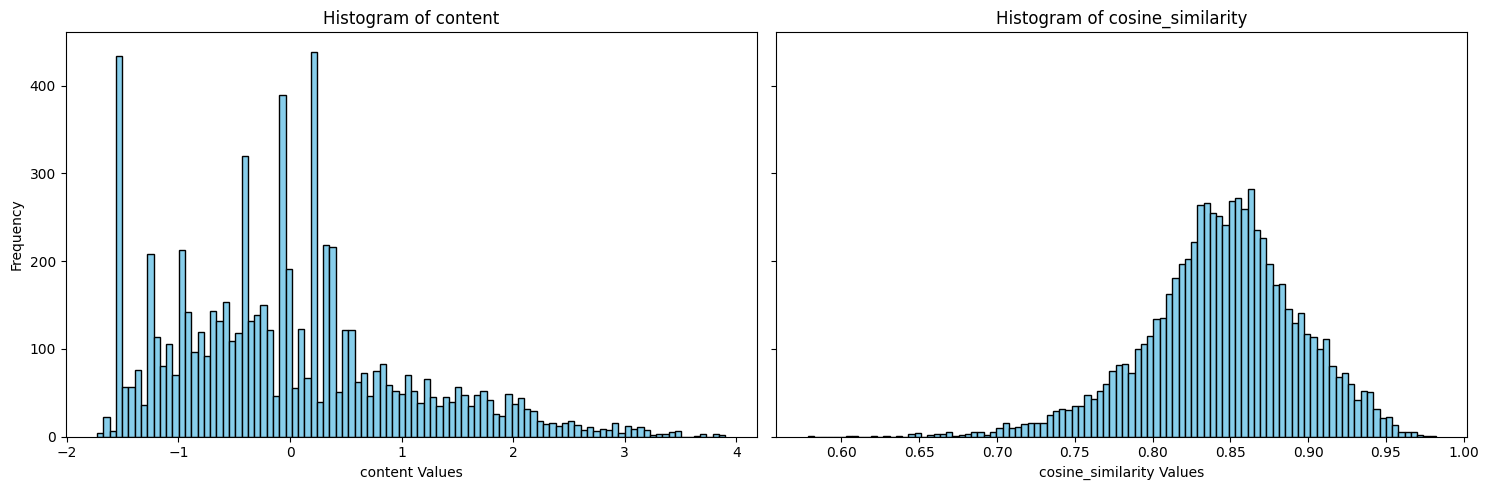

In [39]:
# plot_histogram(df_train, 'content', binsize=100)
plot_side_by_side_histogram(df_train, ['content', 'cosine_similarity'], binsize=100)

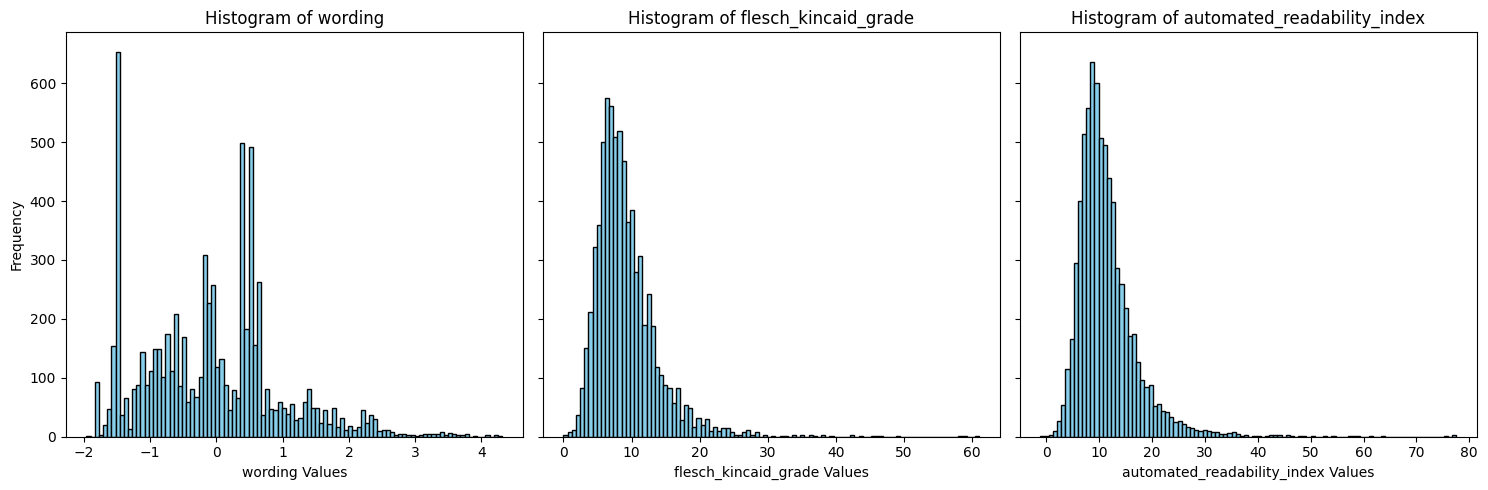

In [40]:
plot_side_by_side_histogram(df_train, ['wording', 'flesch_kincaid_grade', 'automated_readability_index'], binsize=100)

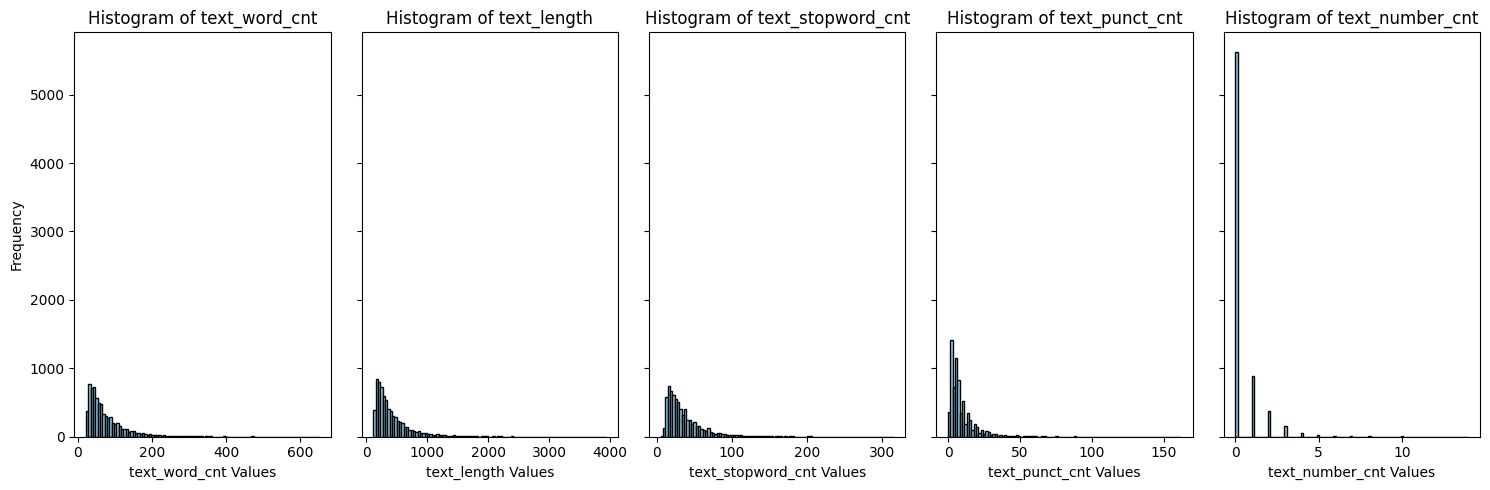

In [41]:
plot_side_by_side_histogram(df_train, ['text_word_cnt', 'text_length','text_stopword_cnt', 'text_punct_cnt', 'text_number_cnt'], binsize=100)

# 3. Use ML

In [42]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import time

In [43]:
def plot_scores_table(scores_dict):
    """
    Plot the scores stored in a dictionary as a table.

    Parameters:
    - scores_dict: A dictionary containing model names as keys and score dictionaries as values.

    Returns:
    None
    """
    # Create a DataFrame from the dictionary
    df_scores = pd.DataFrame(scores_dict).T  # Transpose to have models as rows

    # Plot the DataFrame as a table
    plt.figure(figsize=(8, 4))
    plt.table(cellText=df_scores.values,
              colLabels=df_scores.columns,
              rowLabels=df_scores.index,
              loc='center')

    # Remove axis labels
    plt.axis('off')

    plt.show()

def plot_compare_r2_scores_chart(scores_dict1, scores_dict2):
    """
    Plot the R2 scores stored in two dictionaries in the same bar chart.

    Parameters:
    - scores_dict1: The first dictionary containing model names as keys and score dictionaries as values.
    - scores_dict2: The second dictionary containing model names as keys and score dictionaries as values.

    Returns:
    None
    """
    # Create DataFrames from the dictionaries
    df_scores1 = pd.DataFrame(scores_dict1).T  # Transpose to have models as rows
    df_scores2 = pd.DataFrame(scores_dict2).T  # Transpose to have models as rows

    # Extract R2 scores and plot a bar chart
    r2_scores1 = df_scores1['r2']
    r2_scores2 = df_scores2['r2']

    # Combine R2 scores from both dictionaries
    df_combined = pd.DataFrame({'Content': r2_scores1, 'Wording': r2_scores2})

    # Plot a bar chart
    df_combined.plot(kind='bar', rot=0, figsize=(12, 6), color=['#f68f48', '#31a7cb'])

    # Set plot labels and title
    plt.xlabel('Models')
    plt.ylabel('R2 Scores')
    plt.title('Comparison of R2 Scores for Different Models')

    plt.show()

def plot_compare_mse_scores_chart(scores_dict1, scores_dict2):
    """
    Plot the Mean Squared Error (MSE) scores stored in two dictionaries in the same bar chart.

    Parameters:
    - scores_dict1: The first dictionary containing model names as keys and score dictionaries as values.
    - scores_dict2: The second dictionary containing model names as keys and score dictionaries as values.

    Returns:
    None
    """
    # Create DataFrames from the dictionaries
    df_scores1 = pd.DataFrame(scores_dict1).T  # Transpose to have models as rows
    df_scores2 = pd.DataFrame(scores_dict2).T  # Transpose to have models as rows

    # Extract MSE scores and plot a bar chart
    mse_scores1 = df_scores1['mse']
    mse_scores2 = df_scores2['mse']

    # Combine MSE scores from both dictionaries
    df_combined = pd.DataFrame({'Content': mse_scores1, 'Wording': mse_scores2})

    # Plot a bar chart
    df_combined.plot(kind='bar', rot=0, figsize=(12, 6), color=['#f68f48', '#31a7cb'])

    # Set plot labels and title
    plt.xlabel('Models')
    plt.ylabel('Mean Squared Error (MSE) Scores')
    plt.title('Comparison of MSE Scores for Different Models')

    plt.show()

def plot_compare_rmse_scores_chart(scores_dict1, scores_dict2):
  """
  Plot the Root Mean Squared Error (RMSE) scores stored in two dictionaries in the same bar chart.

  Parameters:
  - scores_dict1: The first dictionary containing model names as keys and score dictionaries as values.
  - scores_dict2: The second dictionary containing model names as keys and score dictionaries as values.

  Returns:
  None
  """
  # Create DataFrames from the dictionaries
  df_scores1 = pd.DataFrame(scores_dict1).T  # Transpose to have models as rows
  df_scores2 = pd.DataFrame(scores_dict2).T  # Transpose to have models as rows

  # Extract RMSE scores and plot a bar chart
  rmse_scores1 = np.sqrt(df_scores1['rmse'])  # Assuming 'rmse' is the key for RMSE in the dictionary
  rmse_scores2 = np.sqrt(df_scores2['rmse'])

  # Combine RMSE scores from both dictionaries
  df_combined = pd.DataFrame({'Content': rmse_scores1, 'Wording': rmse_scores2})

  # Plot a bar chart
  df_combined.plot(kind='bar', rot=0, figsize=(12, 6), color=['#f68f48', '#31a7cb'])

  # Set plot labels and title
  plt.xlabel('Models')
  plt.ylabel('Root Mean Squared Error (RMSE) Scores')
  plt.title('Comparison of RMSE Scores for Different Models')

  plt.show()

def plot_compare_pred_time_chart(scores_dict1, scores_dict2):
  """
  Plot the Root Average Prediction Times stored in two dictionaries in the same bar chart.

  Parameters:
  - scores_dict1: The first dictionary containing model names as keys and score dictionaries as values.
  - scores_dict2: The second dictionary containing model names as keys and score dictionaries as values.

  Returns:
  None
  """
  # Create DataFrames from the dictionaries
  df_scores1 = pd.DataFrame(scores_dict1).T  # Transpose to have models as rows
  df_scores2 = pd.DataFrame(scores_dict2).T  # Transpose to have models as rows

  # Extract RMSE scores and plot a bar chart
  pred_times1 = np.sqrt(df_scores1['avg_time_per_prediction'])  # Assuming 'rmse' is the key for RMSE in the dictionary
  pred_times2 = np.sqrt(df_scores2['avg_time_per_prediction'])

  # Combine RMSE scores from both dictionaries
  df_combined = pd.DataFrame({'Content': pred_times1, 'Wording': pred_times2})

  # Plot a bar chart
  df_combined.plot(kind='bar', rot=0, figsize=(12, 6), color=['#f68f48', '#31a7cb'])

  # Set plot labels and title
  plt.xlabel('Models')
  plt.ylabel('Average Prediction Times')
  plt.title('Comparison of Average Prediction Times for Different Models')

  plt.show()

In [44]:
# Create an empty dictionary to store scores
ml_model_scores_for_wording = {}

def train_and_evaluate_for_wording_with_a_ml_model(model, model_name, ml_model_scores_for_wording):
  # Select features and target variable
  features = df_train[['text_word_cnt', 'text_length', 'text_stopword_cnt', 'text_punct_cnt', 'text_number_cnt', 'flesch_kincaid_grade', 'automated_readability_index']]
  target = df_train['wording']

  # Split the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

  # Standardize the features
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  # Train the regression model
  model.fit(X_train_scaled, y_train)

  # Predict on the test set
  start_time = time.time()
  y_pred = model.predict(X_test_scaled)
  prediction_time = time.time() - start_time

  # Calculate average time per prediction
  avg_time_per_prediction = prediction_time / len(y_test)


  # Evaluate the model
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test, y_pred)
  print(f'Mean Squared Error on Test Set: {mse}')
  print(f'Root Mean Squared Error on Test Set: {rmse}')
  print(f'R2 Score on Test Set: {r2}')
  print(f'Average Time per Prediction: {avg_time_per_prediction} seconds')


  # Store the scores in the dictionary
  ml_model_scores_for_wording[model_name] = {'mse': mse, 'rmse': rmse, 'r2': r2, 'avg_time_per_prediction': avg_time_per_prediction}

  # Visualize the predicted vs. actual values
  plt.scatter(y_test, y_pred)
  plt.xlabel('Actual Wording Values')
  plt.ylabel('Predicted Wording Values')
  plt.title('Actual vs. Predicted Wording Values')
  plt.show()

Mean Squared Error on Test Set: 0.6313437393909375
Root Mean Squared Error on Test Set: 0.7945714186849018
R2 Score on Test Set: 0.37959921472280433
Average Time per Prediction: 3.789740680234048e-06 seconds


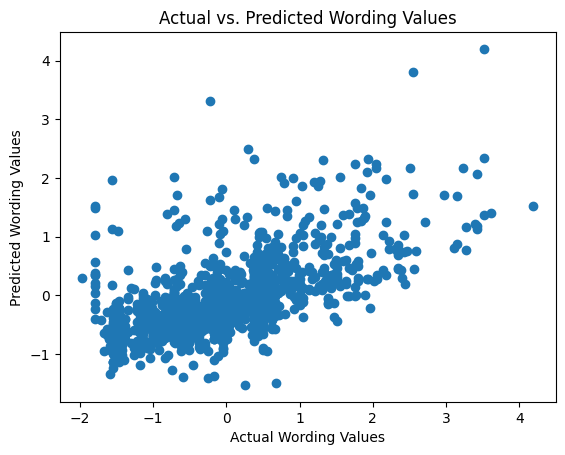

In [45]:
train_and_evaluate_for_wording_with_a_ml_model(LinearRegression(), 'LinearRegression', ml_model_scores_for_wording)

Mean Squared Error on Test Set: 0.6513256251212858
Root Mean Squared Error on Test Set: 0.8070474738956103
R2 Score on Test Set: 0.3599636710007956
Average Time per Prediction: 0.0003029509848510146 seconds


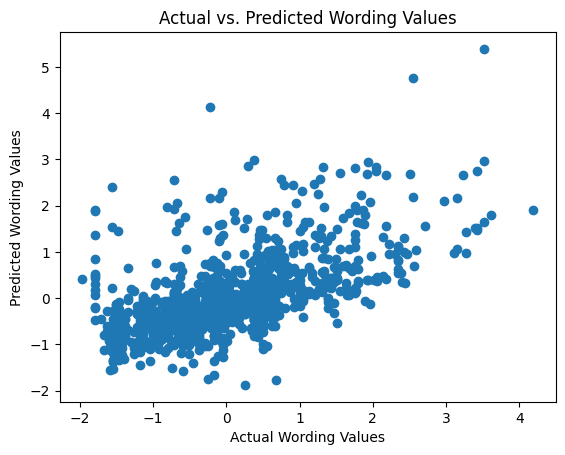

In [46]:
train_and_evaluate_for_wording_with_a_ml_model(SVR(kernel='linear'), 'SVR', ml_model_scores_for_wording)

Mean Squared Error on Test Set: 1.0815374834344744
Root Mean Squared Error on Test Set: 1.039969943524559
R2 Score on Test Set: -0.06279141165916413
Average Time per Prediction: 7.140910966531097e-07 seconds


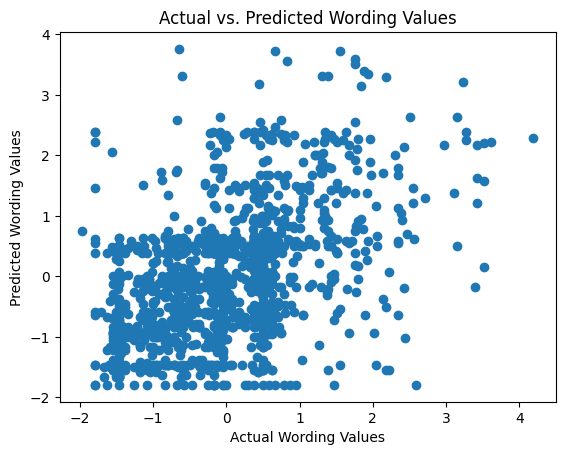

In [47]:
train_and_evaluate_for_wording_with_a_ml_model(DecisionTreeRegressor(random_state=42), 'DTR', ml_model_scores_for_wording)

Mean Squared Error on Test Set: 0.52538072199499
Root Mean Squared Error on Test Set: 0.7248315128324582
R2 Score on Test Set: 0.483725596440324
Average Time per Prediction: 9.169199212148151e-05 seconds


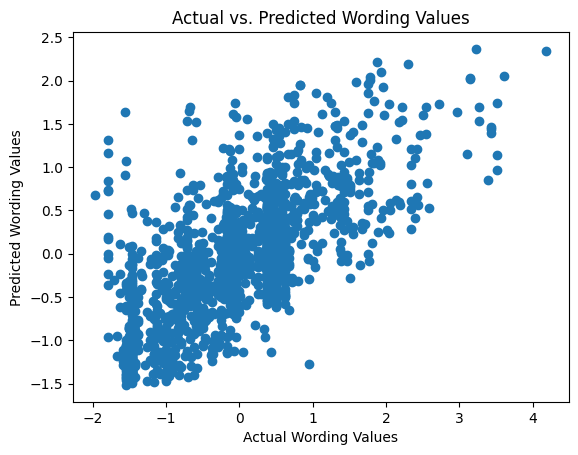

In [48]:
train_and_evaluate_for_wording_with_a_ml_model(RandomForestRegressor(n_estimators=100, random_state=42), 'RFR', ml_model_scores_for_wording)

Mean Squared Error on Test Set: 0.520734964427305
Root Mean Squared Error on Test Set: 0.7216196812915409
R2 Score on Test Set: 0.48829083002604023
Average Time per Prediction: 1.008445702477593e-05 seconds


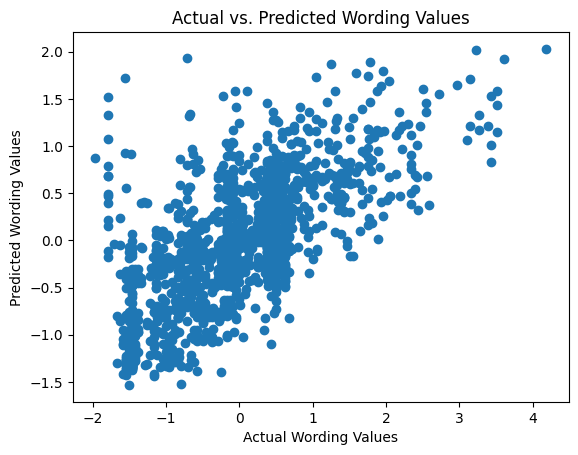

In [49]:
train_and_evaluate_for_wording_with_a_ml_model(GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42), 'GBR', ml_model_scores_for_wording)

Mean Squared Error on Test Set: 0.6314637486706405
Root Mean Squared Error on Test Set: 0.7946469333425006
R2 Score on Test Set: 0.37948128553982063
Average Time per Prediction: 9.555044660015864e-07 seconds


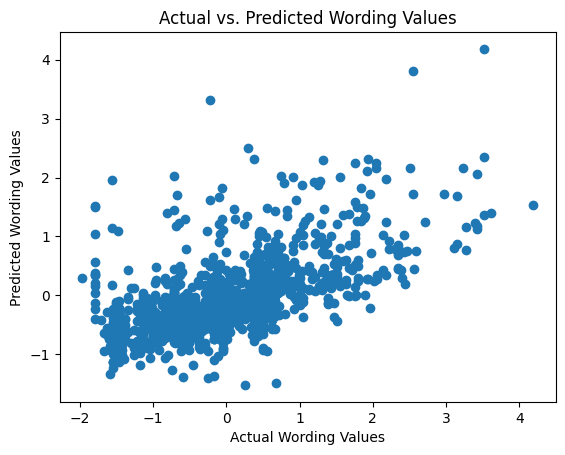

In [50]:
train_and_evaluate_for_wording_with_a_ml_model(Ridge(alpha=1.0), 'Ridge', ml_model_scores_for_wording)

Mean Squared Error on Test Set: 1.0179808677551176
Root Mean Squared Error on Test Set: 1.0089503792333485
R2 Score on Test Set: -0.0003364100223808286
Average Time per Prediction: 3.096113983601519e-06 seconds


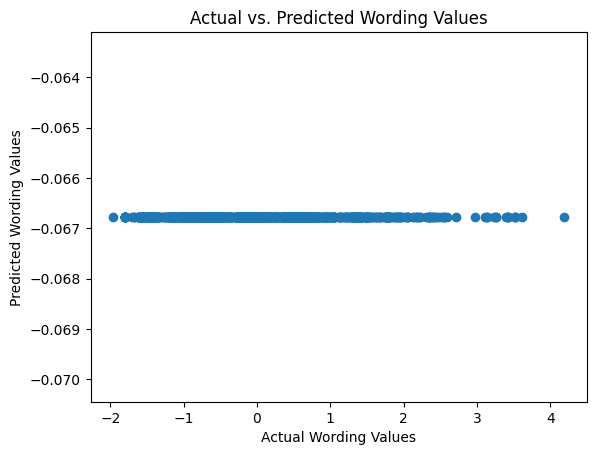

In [51]:
train_and_evaluate_for_wording_with_a_ml_model(Lasso(alpha=1.0), 'Lasso', ml_model_scores_for_wording)

Mean Squared Error on Test Set: 0.625473737250756
Root Mean Squared Error on Test Set: 0.7908689760325385
R2 Score on Test Set: 0.3853674732959561
Average Time per Prediction: 5.3944657585958624e-05 seconds


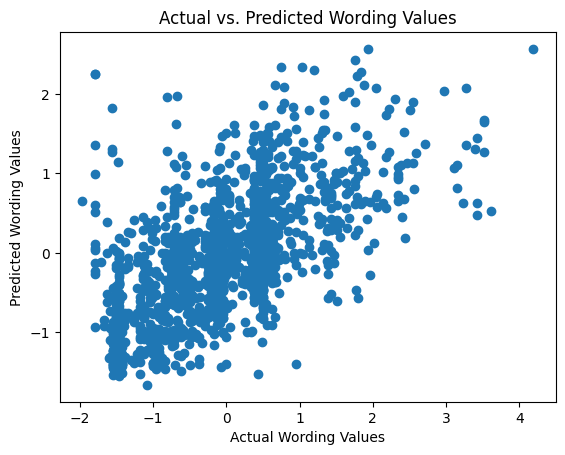

In [52]:
train_and_evaluate_for_wording_with_a_ml_model(KNeighborsRegressor(n_neighbors=5), 'KNR', ml_model_scores_for_wording)

In [53]:
# Create an empty dictionary to store scores
ml_model_scores_for_content = {}


def train_and_evaluate_for_content_with_a_ml_model(model, model_name, ml_model_scores_for_content):
  # Select features and target variable
  features = df_train[[ 'text_word_cnt', 'text_length', 'text_stopword_cnt', 'text_punct_cnt', 'text_number_cnt', 'cosine_similarity']]
  target = df_train['content']

  # Split the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

  # Standardize the features
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  # Train the regression model
  model.fit(X_train_scaled, y_train)

  # Predict on the test set
  start_time = time.time()
  y_pred = model.predict(X_test_scaled)
  prediction_time = time.time() - start_time

  # Calculate average time per prediction
  avg_time_per_prediction = prediction_time / len(y_test)

  # Evaluate the model
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test, y_pred)
  print(f'Mean Squared Error on Test Set: {mse}')
  print(f'Root Mean Squared Error on Test Set: {rmse}')
  print(f'R2 Score on Test Set: {r2}')
  print(f'Average Time per Prediction: {avg_time_per_prediction} seconds')


  # Store the scores in the dictionary
  ml_model_scores_for_content[model_name] = {'mse': mse, 'rmse': rmse, 'r2': r2, 'avg_time_per_prediction': avg_time_per_prediction}

  # Visualize the predicted vs. actual values
  plt.scatter(y_test, y_pred)
  plt.xlabel('Actual Content Values')
  plt.ylabel('Predicted Content Values')
  plt.title('Actual vs. Predicted Content Values')
  plt.show()

Mean Squared Error on Test Set: 0.33039464776283795
Root Mean Squared Error on Test Set: 0.5747996588054293
R2 Score on Test Set: 0.6948968837943201
Average Time per Prediction: 2.4640468642666716e-07 seconds


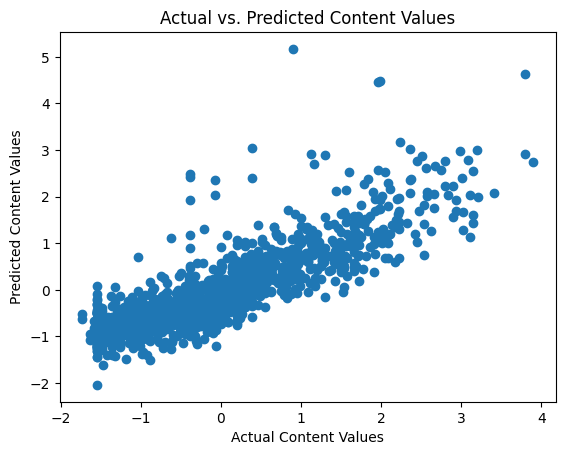

In [54]:
train_and_evaluate_for_content_with_a_ml_model(LinearRegression(), 'LinearRegression', ml_model_scores_for_content)

Mean Squared Error on Test Set: 0.3388938770097522
Root Mean Squared Error on Test Set: 0.5821459241545476
R2 Score on Test Set: 0.687048265948545
Average Time per Prediction: 0.00010847762507819996 seconds


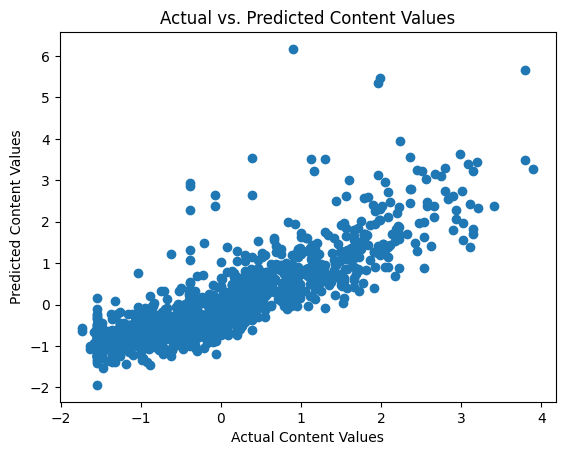

In [55]:
train_and_evaluate_for_content_with_a_ml_model(SVR(kernel='linear'), 'SVR', ml_model_scores_for_content)

Mean Squared Error on Test Set: 0.5659635760485088
Root Mean Squared Error on Test Set: 0.7523055071236079
R2 Score on Test Set: 0.47736062953640657
Average Time per Prediction: 6.651761892868436e-07 seconds


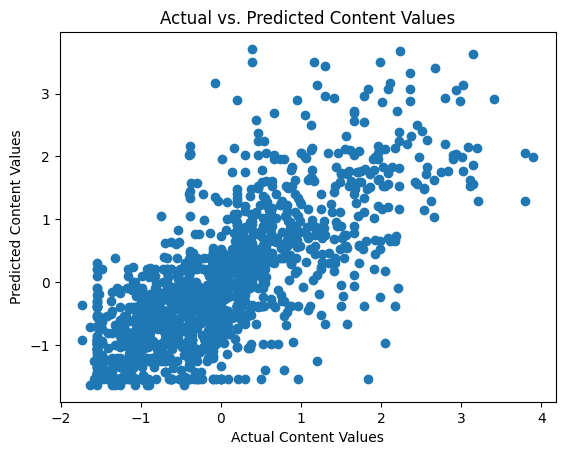

In [56]:
train_and_evaluate_for_content_with_a_ml_model(DecisionTreeRegressor(random_state=42), 'DTR', ml_model_scores_for_content)

Mean Squared Error on Test Set: 0.27662432249891244
Root Mean Squared Error on Test Set: 0.5259508746060914
R2 Score on Test Set: 0.7445511197466916
Average Time per Prediction: 3.262674234500733e-05 seconds


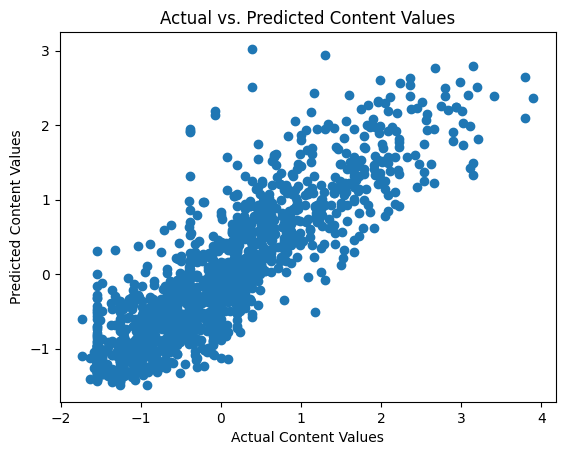

In [57]:
train_and_evaluate_for_content_with_a_ml_model(RandomForestRegressor(n_estimators=100, random_state=42), 'RFR', ml_model_scores_for_content)

Mean Squared Error on Test Set: 0.25334596449025115
Root Mean Squared Error on Test Set: 0.5033348433103466
R2 Score on Test Set: 0.7660475320423659
Average Time per Prediction: 2.663865924630228e-06 seconds


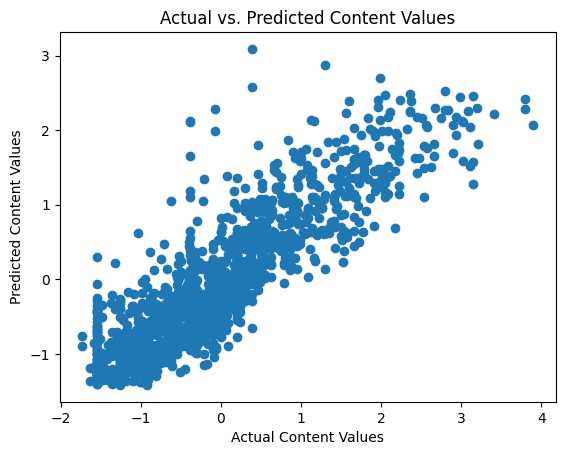

In [58]:
train_and_evaluate_for_content_with_a_ml_model(GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42), 'GBR', ml_model_scores_for_content)

Mean Squared Error on Test Set: 0.3304406264788548
Root Mean Squared Error on Test Set: 0.5748396528414291
R2 Score on Test Set: 0.6948544247241418
Average Time per Prediction: 6.53529782771066e-07 seconds


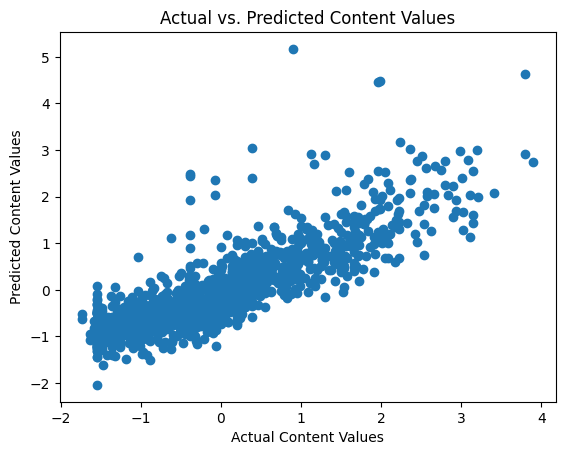

In [59]:
train_and_evaluate_for_content_with_a_ml_model(Ridge(alpha=1.0), 'Ridge', ml_model_scores_for_content)

Mean Squared Error on Test Set: 1.082902397571271
Root Mean Squared Error on Test Set: 1.0406259642980618
R2 Score on Test Set: -6.80484013360072e-06
Average Time per Prediction: 3.2876141821680914e-07 seconds


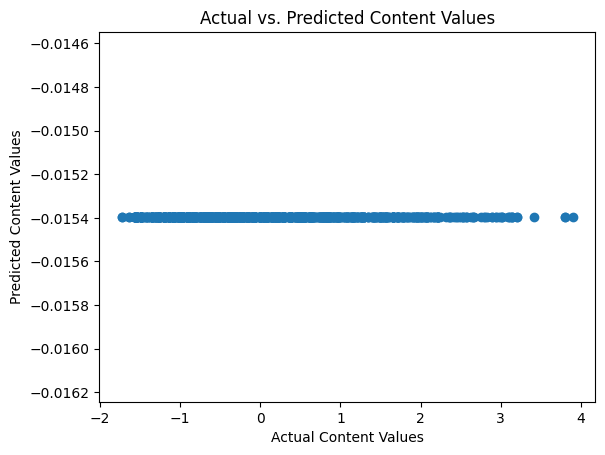

In [60]:
train_and_evaluate_for_content_with_a_ml_model(Lasso(alpha=1.0), 'Lasso', ml_model_scores_for_content)

Mean Squared Error on Test Set: 0.3102276126839647
Root Mean Squared Error on Test Set: 0.5569808010012236
R2 Score on Test Set: 0.7135201432473915
Average Time per Prediction: 1.7592063419318083e-05 seconds


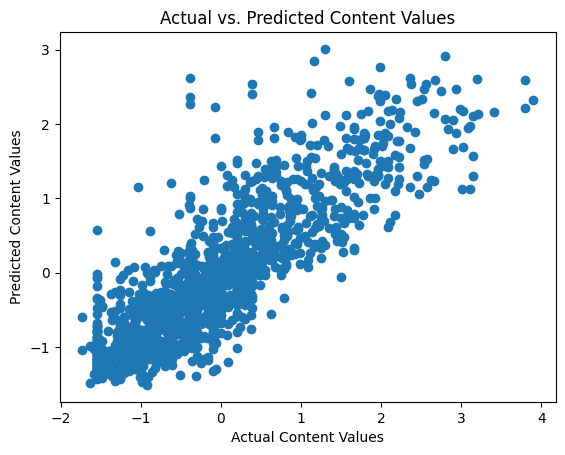

In [61]:
train_and_evaluate_for_content_with_a_ml_model(KNeighborsRegressor(n_neighbors=5), 'KNR', ml_model_scores_for_content)

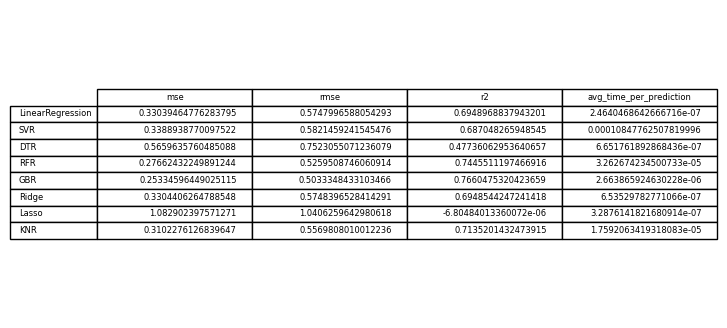

In [62]:
# Plot scores for content
plot_scores_table(ml_model_scores_for_content)

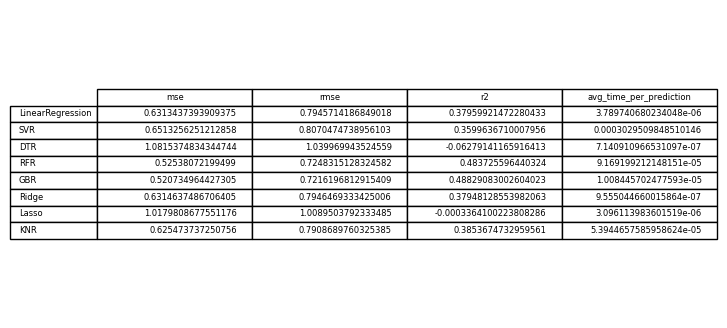

In [64]:
# Plot scores for wording
plot_scores_table(ml_model_scores_for_wording)

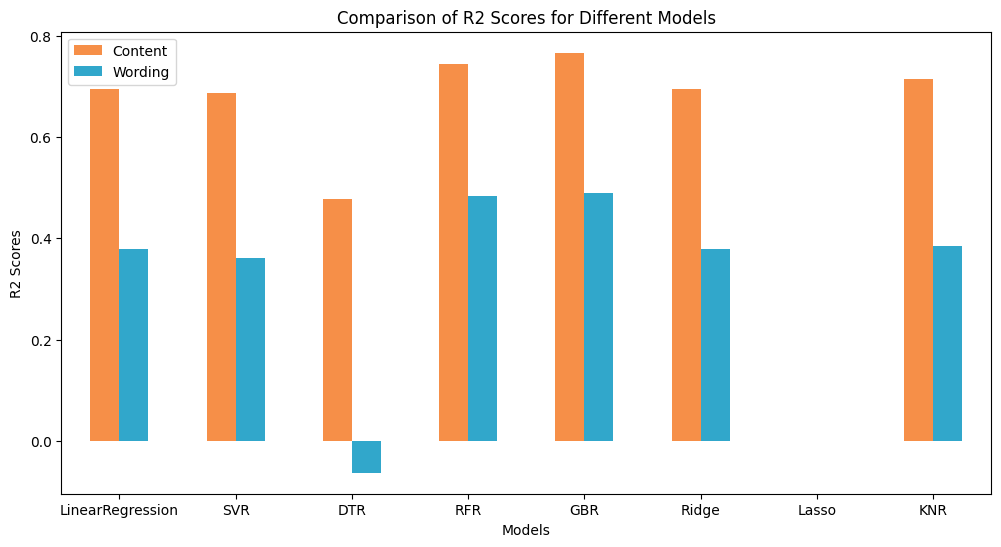

In [65]:
plot_compare_r2_scores_chart(ml_model_scores_for_content, ml_model_scores_for_wording)

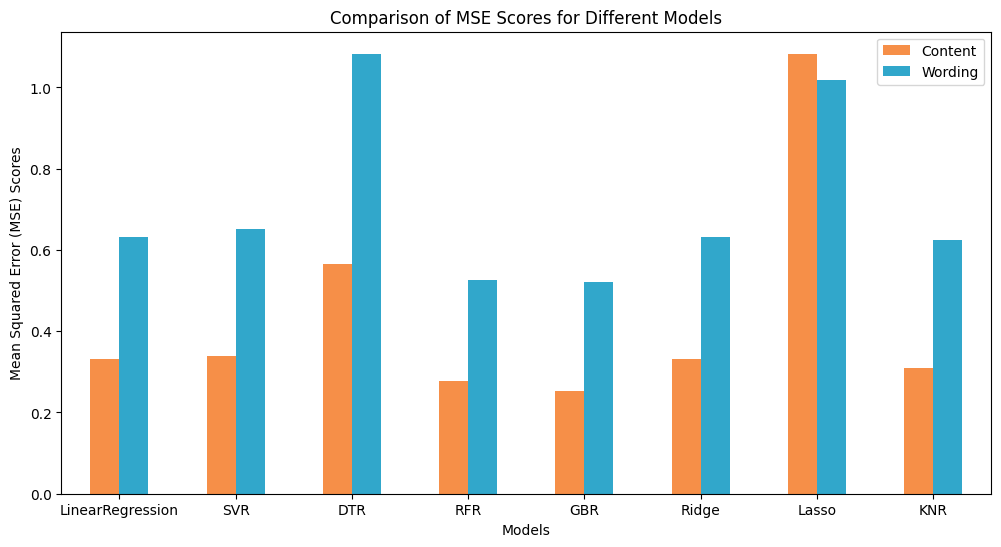

In [66]:
plot_compare_mse_scores_chart(ml_model_scores_for_content, ml_model_scores_for_wording)

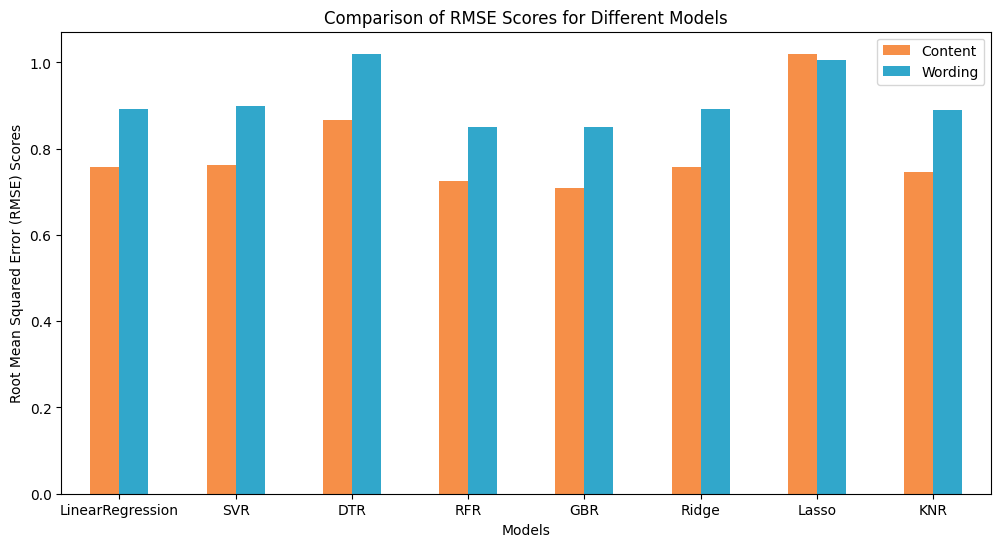

In [67]:
plot_compare_rmse_scores_chart(ml_model_scores_for_content, ml_model_scores_for_wording)

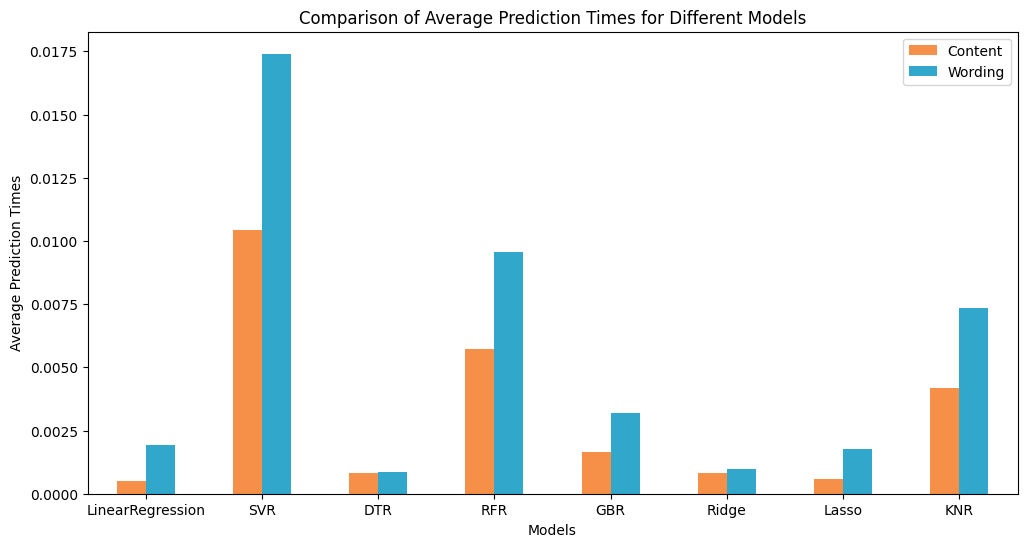

In [68]:
plot_compare_pred_time_chart(ml_model_scores_for_content, ml_model_scores_for_wording)

# 3. Use DL

In [69]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

Epoch 1/150
144/144 - 2s - loss: 2.8001 - val_loss: 1.9335 - 2s/epoch - 13ms/step
Epoch 2/150
144/144 - 0s - loss: 2.3475 - val_loss: 1.7707 - 376ms/epoch - 3ms/step
Epoch 3/150
144/144 - 0s - loss: 2.1545 - val_loss: 1.6924 - 338ms/epoch - 2ms/step
Epoch 4/150
144/144 - 0s - loss: 2.0158 - val_loss: 1.6501 - 340ms/epoch - 2ms/step
Epoch 5/150
144/144 - 0s - loss: 2.0082 - val_loss: 1.6151 - 333ms/epoch - 2ms/step
Epoch 6/150
144/144 - 0s - loss: 1.9135 - val_loss: 1.5742 - 327ms/epoch - 2ms/step
Epoch 7/150
144/144 - 0s - loss: 1.8642 - val_loss: 1.5504 - 342ms/epoch - 2ms/step
Epoch 8/150
144/144 - 0s - loss: 1.8267 - val_loss: 1.5205 - 319ms/epoch - 2ms/step
Epoch 9/150
144/144 - 0s - loss: 1.7867 - val_loss: 1.4923 - 474ms/epoch - 3ms/step
Epoch 10/150
144/144 - 0s - loss: 1.6806 - val_loss: 1.4472 - 498ms/epoch - 3ms/step
Epoch 11/150
144/144 - 0s - loss: 1.6930 - val_loss: 1.4208 - 499ms/epoch - 3ms/step
Epoch 12/150
144/144 - 1s - loss: 1.6434 - val_loss: 1.3943 - 1s/epoch - 9ms

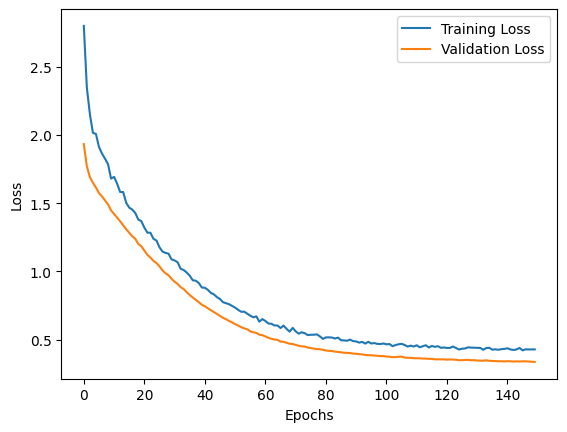

In [70]:
def train_and_evaluate_for_content_with_a_dl_model(optimizer, scaler):
  # Select features and target variable
  features = df_train[['text_word_cnt', 'text_length', 'text_stopword_cnt', 'text_punct_cnt', 'text_number_cnt', 'cosine_similarity']]
  target = df_train['content']

  # Split the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

  # Standardize the features
  # scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  # Build the neural network model
  # model = keras.Sequential([
  #     layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
  #     layers.Dense(32, activation='relu'),
  #     layers.Dense(1)  # Output layer with 1 neuron for regression
  # ])

  model = keras.Sequential([
      layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(X_train_scaled.shape[1],)),
      layers.Dropout(0.5),
      layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
      layers.Dropout(0.5),
      layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
      layers.Dropout(0.5),
      layers.Dense(1)
  ])

  # Compile the model
  model.compile(optimizer, loss='mean_squared_error')

  # Train the model
  history = model.fit(X_train_scaled, y_train, epochs=150, batch_size=32, validation_split=0.2, verbose=2)

  # Evaluate the model on the test set
  y_pred = model.predict(X_test_scaled)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  print(f'Mean Squared Error on Test Set: {mse}')
  print(f'R2 Score on Test Set: {r2}')

  #visualize training history
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()


optimizer=Adam(learning_rate=0.0001)
scaler = StandardScaler()
#variables - model, optimizer, scaler
train_and_evaluate_for_content_with_a_dl_model(optimizer, scaler)


Epoch 1/100
144/144 - 2s - loss: 2.1042 - val_loss: 1.6482 - 2s/epoch - 11ms/step
Epoch 2/100
144/144 - 0s - loss: 1.6094 - val_loss: 1.3300 - 380ms/epoch - 3ms/step
Epoch 3/100
144/144 - 0s - loss: 1.3393 - val_loss: 1.1466 - 344ms/epoch - 2ms/step
Epoch 4/100
144/144 - 0s - loss: 1.1808 - val_loss: 1.0215 - 370ms/epoch - 3ms/step
Epoch 5/100
144/144 - 0s - loss: 1.0764 - val_loss: 0.9250 - 360ms/epoch - 2ms/step
Epoch 6/100
144/144 - 0s - loss: 0.9890 - val_loss: 0.8620 - 350ms/epoch - 2ms/step
Epoch 7/100
144/144 - 0s - loss: 0.9337 - val_loss: 0.8128 - 369ms/epoch - 3ms/step
Epoch 8/100
144/144 - 0s - loss: 0.8761 - val_loss: 0.7744 - 377ms/epoch - 3ms/step
Epoch 9/100
144/144 - 0s - loss: 0.8507 - val_loss: 0.7601 - 324ms/epoch - 2ms/step
Epoch 10/100
144/144 - 0s - loss: 0.8202 - val_loss: 0.7237 - 338ms/epoch - 2ms/step
Epoch 11/100
144/144 - 0s - loss: 0.7997 - val_loss: 0.7082 - 339ms/epoch - 2ms/step
Epoch 12/100
144/144 - 0s - loss: 0.7935 - val_loss: 0.6902 - 331ms/epoch - 

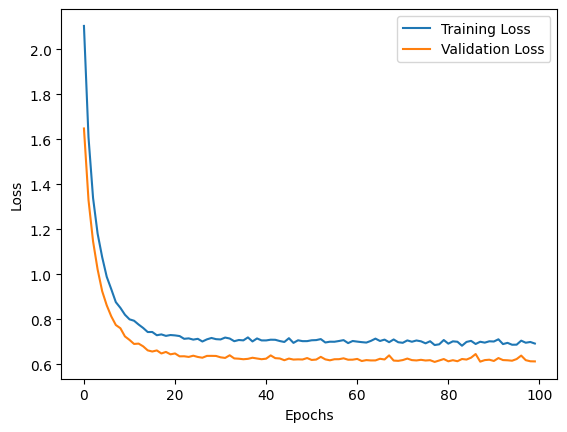

In [71]:
# Select features and target variable
features = df_train[['text_word_cnt', 'text_length', 'text_stopword_cnt', 'text_punct_cnt', 'text_number_cnt', 'flesch_kincaid_grade', 'automated_readability_index']]
target = df_train['wording']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = keras.Sequential([
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(1)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2)

# Evaluate the model on the test set
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error on Test Set: {mse}')
print(f'R2 Score on Test Set: {r2}')

# Optionally, you can visualize training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()